In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Slider
from sklearn import cluster ,datasets

In [4]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [5]:
varied = pd.DataFrame(datasets.make_blobs(n_samples=1500,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)[0])

In [6]:
dbscan =cluster.DBSCAN(eps=0.2,min_samples=10)

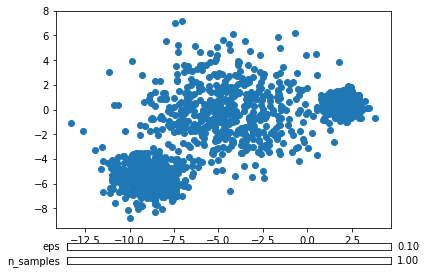

In [27]:
fig = plt.figure()
val = 30
dbscan =cluster.DBSCAN(eps=1,min_samples=5)
col=dbscan.fit(varied).labels_
cmap = cm.ScalarMappable(colors.Normalize(0,12),cm.rainbow)
line = plt.scatter(varied.iloc[:,0],varied.iloc[:,1])
ax1 = plt.axes([0.15,0.05,0.75,0.025])
ax2 = plt.axes([0.15,0,0.75,0.025])
slider1 = Slider(ax1,label = 'eps',valmax = 2, valmin = 0.1,valstep=0.1,valinit=0.1)
slider2 = Slider(ax2,label = 'n_samples',valmax = 7,valmin = 1,valstep=1,valinit=1)

def updata1(a) :
    dbscan =cluster.DBSCAN(eps=a,min_samples=slider2.val)
    col=dbscan.fit(varied).labels_
    cmap = cm.ScalarMappable(colors.Normalize(0,12),cm.rainbow)
    line.set_color(cmap.to_rgba(col))

slider1.on_changed(updata1)

def updata2(b) :
    dbscan =cluster.DBSCAN(eps=slider1.val,min_samples=b)
    col = dbscan.fit(varied).labels_+1/max(dbscan.fit(varied).labels_+1)
    cmap = cm.ScalarMappable(colors.Normalize(1),cm.rainbow)
    line.set_color(cmap.to_rgba(col))

slider2.on_changed(updata2)

plt.show()